# Making a CMD for your Star Cluster


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_csv("oh_table.csv")

In [5]:
df.head()

,row_id,tgas_source_id,name,ra,dec,parallax,distance,G,J,rave_obs_id,rv,erv,group_id,group_size
0,659,49809491645958528,TYC 1253-388-1,59.457281,18.562195,7.7395,129.949,11.160,9.984,NaN,NaN,NaN,0,151
1,1559,66939848447027584,TYC 1804-1924-1,57.070387,25.214932,7.6087,132.557,9.066,8.137,20120109_0346p23_140,2.95,1.6,0,151
2,1904,50905051903831680,HIP 18091,58.003444,19.596690,6.7611,148.752,10.265,9.267,NaN,NaN,NaN,0,151
3,1929,51452746133437696,HIP 18544,59.507154,20.676596,7.6989,131.839,9.249,8.436,NaN,NaN,NaN,0,151
4,1944,51619115986889472,TYC 1261-1630-1,58.370320,20.907178,7.4847,134.194,11.553,10.096,NaN,NaN,NaN,0,151


In [6]:
G = df["G"].loc[df["group_id"] == 1] #this allows us to index this list! Each group will use their group id
J = df["J"].loc[df["group_id"] == 1]
d = df["distance"].loc[df['group_id'] == 1]
G_J = G - J
absG = G - 5*np.log10(d) + 5

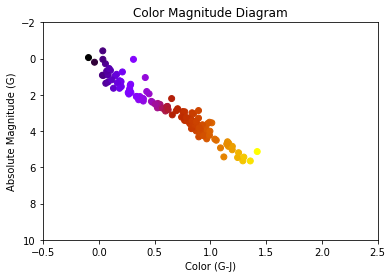

In [7]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(G_J, absG, c=G_J, cmap=cm)
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

#### Next, add a second plot that adds the sun to your plot with a * marker.
Note: To show both plots on the same figure, you'll need to move the plt.show() command to the end of the code for the second plot.

#### Finished? Find the color and absolute magnitude of the sun and the average color and absolute magnitude for your cluster.

In [8]:
SunJ = 3.64
SunG = 5.12
SunG_J = SunG-SunJ

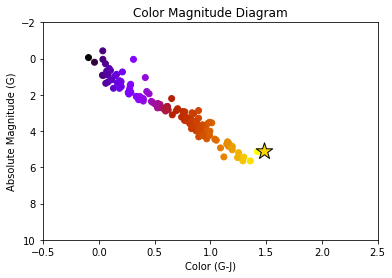

In [23]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(G_J, absG, c=G_J, cmap=cm)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 300)
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.savefig("Plots/Color Magnitude Diagram_1.png",dpi= 1500)
plt.show()

In [10]:
original_G = df["G"]
original_J = df["J"]
originalG_J = original_G - original_J
absolDf_G = df["G"] - 5*np.log10(df["distance"]) + 5

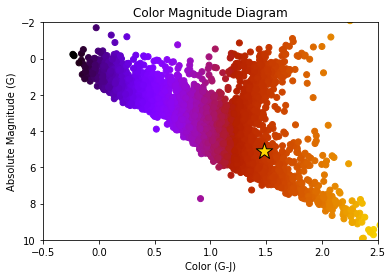

In [20]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(originalG_J, absolDf_G, c=originalG_J, cmap=cm)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 300)
plt.ylim([-2,10])
plt.xlim([-0.5, 2.5])
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.savefig("Plots/Color Magnitude Diagram_2.png", dpi = 1500)
plt.show()

In [12]:
dwarfdata = pd.read_csv("bdnyc_sampledata.csv")

In [13]:
dwarfdata.head()

,Unnamed: 0,source_id,shortname,ra,dec,parallax,G,J
0,0,1,1658+1820,254.709737,18.333275,17.93,20.380,15.484
1,3,4,1448+1031,222.106791,10.533056,69.00,19.835,14.556
2,8,8,1728+0839,262.047250,8.666389,28.56,18.202,13.634
3,10,10,1731+2721,262.873917,27.356472,83.74,16.804,12.094
4,16,16,1301-1510,195.477670,-15.172858,32.27,19.373,14.538


In [14]:
dwarf_G = dwarfdata["G"]
dwarf_J = dwarfdata["J"]
dwarf_d = 1/dwarfdata["parallax"]
dwarfG_J = dwarf_G - dwarf_J
dwarf_absG = dwarf_G - 5*np.log10(dwarf_d) + 5

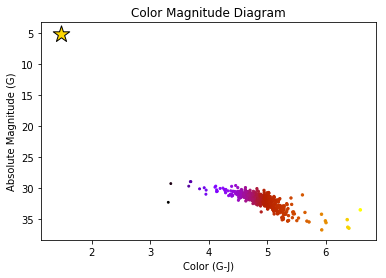

In [15]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(dwarfG_J , dwarf_absG, dwarfG_J, c = dwarfG_J, cmap=cm)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 300)
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

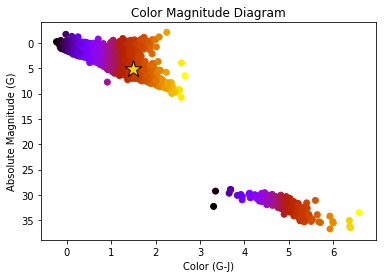

In [16]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(originalG_J, absolDf_G, c=originalG_J, cmap=cm)
plt.scatter(dwarfG_J, dwarf_absG, c = dwarfG_J, cmap=cm)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 300)
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.show()

In [17]:
dwarfdata.shape

(629, 8)

In [18]:
combine_G = df["G"].append(dwarfdata["G"])
combine_J = df["J"].append(dwarfdata["J"])
combine_D = df["distance"].append(dwarf_d)
combine_absG = combine_G - 5*np.log10(combine_D) + 5
combineG_J = combine_G - combine_J

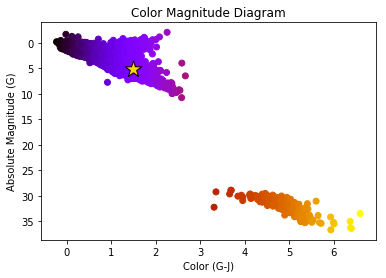

In [22]:
cm = plt.cm.get_cmap("gnuplot")
plt.scatter(combineG_J, combine_absG, c=combineG_J, cmap=cm)
plt.scatter(SunG_J, SunG, marker = "*", color = "gold",edgecolor="black", s = 300)
plt.gca().invert_yaxis()
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude (G)')
plt.title('Color Magnitude Diagram')
plt.savefig("Plots/Color_Magnitude_Diagram.png", dpi = 1500)
plt.show()